In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 3. 데이터 전처리

### *결측치*

결측치는 시계열 데이터에서 흔히 발생하는 문제입니다. 결측치는 데이터가 누락되어 있거나 기록되지 않았음을 의미합니다.

데이터 분석과 예측에 부정적인 영향을 미칠 수 있으며, 데이터의 왜곡과 모델의 부정확성을 야기할 수 있습니다. 따라서 결측치 처리는 시계열 데이터 분석에서 매우 중요합니다. 결측치 처리 방법은 데이터의 특성과 분석 목적 에 따라 다양하게 적용될 수 있습니다.

#### 결측치 위치 확인 방법

In [2]:
#예시 데이터 생성
data = pd.DataFrame({
    'A' : [1, 2, np.nan, 4, 5],
    'B' : [np.nan, np.nan, 6, 7, 8],
    'C' : [9, 10, 11, 12, np.nan]
})

print(data)

     A    B     C
0  1.0  NaN   9.0
1  2.0  NaN  10.0
2  NaN  6.0  11.0
3  4.0  7.0  12.0
4  5.0  8.0   NaN


In [3]:
#결측치 위치 확인
print(data.isnull())

       A      B      C
0  False   True  False
1  False   True  False
2   True  False  False
3  False  False  False
4  False  False   True


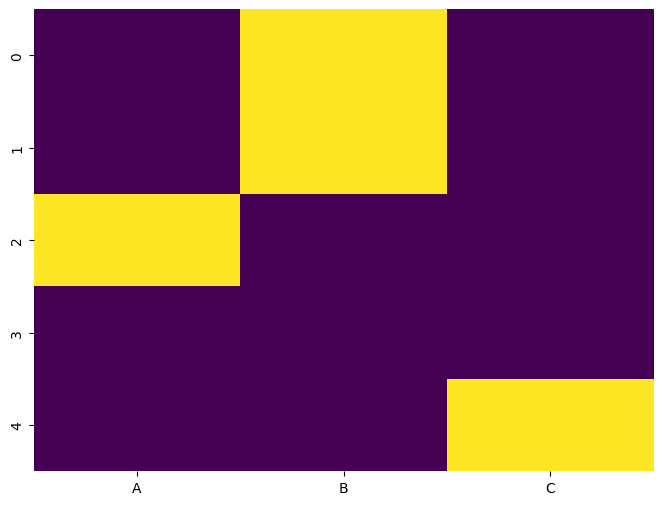

In [4]:
#결측치 히트맵 시각화
plt.figure(figsize=(8,6))
sns.heatmap(data.isnull(), cmap='viridis', cbar=False)
plt.show()

In [5]:
#결측치 개수 확인
missing_count = data.isnull().sum()
print(missing_count)

A    1
B    2
C    1
dtype: int64


#### 결측치의 삭제

결측치가 있는 행 또는 열을 삭제하는 방법은 결측치 처리 전략 중 하나입니다. 결측치가 있는 행 또는 열을 삭 제하면 해당 데이터가 분석에 사용되지 않게 됩니다. 시계열 데이터의 경우, 특히 시간적인 흐름을 가지고 있 는 데이터이기 때문에 결측치를 삭제하는 것은 신중하게 고려해야 합니다.

In [6]:
dates = pd.date_range(start='2023-01-01', periods=500, freq='D')
values = np.random.randn(500)

#결측치 생성
values[10] = np.nan

#데이터 프레임 생성
data = pd.DataFrame({
    'Date' : dates,
    'Value' : values
})

row = data.iloc[10]
print(row)

Date     2023-01-11 00:00:00
Value                    NaN
Name: 10, dtype: object


In [9]:
#결측치 개수 확인
print(data.isnull().sum())

#결측치 삭제
data_without_missing = data.dropna(axis=0)
print(data_without_missing[:11])

Date     0
Value    1
dtype: int64
         Date     Value
0  2023-01-01  1.240767
1  2023-01-02 -0.568196
2  2023-01-03 -0.124910
3  2023-01-04 -1.565610
4  2023-01-05 -0.569662
5  2023-01-06 -1.619627
6  2023-01-07 -0.548352
7  2023-01-08 -0.121793
8  2023-01-09  0.076721
9  2023-01-10  1.422066
11 2023-01-12  1.095179


### *시계열 데이터 전처리(선형, 스플라인, 최근접 이웃 보간법)*

#### - 선형 보간

결측치 앞뒤 데이터의 경향성을 이용하여 대체하기 때문에, 해당 데이터의 추세나 패턴을 유지하는 경향이 있습니다. 하지만 선형적인 대체 방식이기 때문에, 데이터가 비선형적인 패턴을 가지거나 특이한 값을 가진 경우에는 적합하지 않을 수 있습니다.

간단하고 계산이 비교적 빠르며, 시계열 데이터에서 결측치 대체에 널리 사용되는 방법 중 하나입니다. 그 러나 데이터의 선형적인 특성을 가정하고 있기 때문에, 실제 데이터의 특성과 부합하지 않을 수도 있습니다. 따라서 데이터의 특성과 목적에 따라 다른 대체 방법과 비교하여 적절한 결정을 내리는 것이 중요합니다.

In [13]:
#시계열 데이터 생성
dates = pd.date_range(start='2023-01-01', periods=10, freq='D')
values = [1, 2, 3,  np.nan, 5, 6, np.nan, 8, 9, np.nan]

#데이터 프레임 생성
data = pd.DataFrame({
    'Date' : dates,
    'Value' : values
})

print(data)

        Date  Value
0 2023-01-01    1.0
1 2023-01-02    2.0
2 2023-01-03    3.0
3 2023-01-04    NaN
4 2023-01-05    5.0
5 2023-01-06    6.0
6 2023-01-07    NaN
7 2023-01-08    8.0
8 2023-01-09    9.0
9 2023-01-10    NaN


In [14]:
#선형보간 적용
data['Value_linear'] = data['Value'].interpolate(method='linear')
print(data)

        Date  Value  Value_linear
0 2023-01-01    1.0           1.0
1 2023-01-02    2.0           2.0
2 2023-01-03    3.0           3.0
3 2023-01-04    NaN           4.0
4 2023-01-05    5.0           5.0
5 2023-01-06    6.0           6.0
6 2023-01-07    NaN           7.0
7 2023-01-08    8.0           8.0
8 2023-01-09    9.0           9.0
9 2023-01-10    NaN           9.0


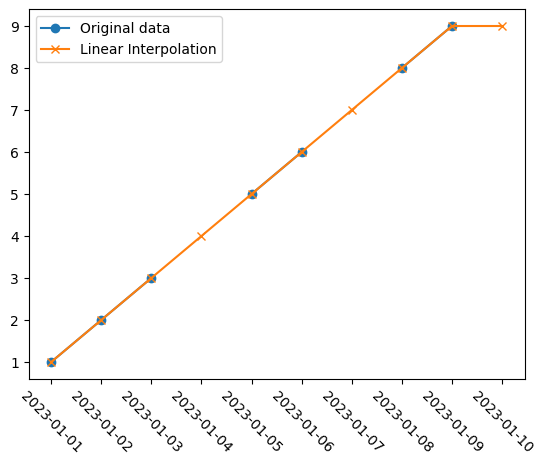

In [15]:
#선형보간 시각화
plt.plot(data['Date'], data['Value'], 'o-', label='Original data')
plt.plot(data['Date'], data['Value_linear'], 'x-', label='Linear Interpolation')
plt.legend()
plt.xticks(rotation=-45)
plt.show()

#### - 스플라인 보간

주어진 데이터를 부드러운 곡선으로 근사화하여 결측치를 채 웁니다. 스플라인 보간은 다항식 또는 조각적 다항식 함수를 사용하여 결측치를 추정합니다. 주로 크기가 큰 데이터셋이나 곡선의 특징을 잘 파악해야 하는 경우에 사용됩니다.

In [20]:
from scipy.interpolate import CubicSpline

In [21]:
#시계열 데이터 생성
dates = pd.date_range(start='2023-01-01', periods=1000, freq='D')
values = np.random.randn(1000)

#데이터 프레임 생성
data = pd.DataFrame({
    'Date' : dates,
    'Value' : values
})

#결측치 생성
#100 - 200 -> NAN
data.loc[100:200, 'Value'] = np.nan

#결측치 체크 확인
print(data.loc[100:200])

          Date  Value
100 2023-04-11    NaN
101 2023-04-12    NaN
102 2023-04-13    NaN
103 2023-04-14    NaN
104 2023-04-15    NaN
..         ...    ...
196 2023-07-16    NaN
197 2023-07-17    NaN
198 2023-07-18    NaN
199 2023-07-19    NaN
200 2023-07-20    NaN

[101 rows x 2 columns]


In [22]:
#결측치 처리
data['Value_filled_1'] = data['Value'].interpolate(method='linear')
print(data.loc[100:200])

          Date  Value  Value_filled_1
100 2023-04-11    NaN        1.115182
101 2023-04-12    NaN        1.103755
102 2023-04-13    NaN        1.092328
103 2023-04-14    NaN        1.080900
104 2023-04-15    NaN        1.069473
..         ...    ...             ...
196 2023-07-16    NaN        0.018177
197 2023-07-17    NaN        0.006750
198 2023-07-18    NaN       -0.004677
199 2023-07-19    NaN       -0.016104
200 2023-07-20    NaN       -0.027531

[101 rows x 3 columns]


In [25]:
#스플라인 보간법 적용
spl = CubicSpline(data.index, data['Value_filled_1'])
data['Value_spline'] = spl(data.index)
print(data.loc[100:200])

          Date  Value  Value_filled_1  Value_spline
100 2023-04-11    NaN        1.115182      1.115182
101 2023-04-12    NaN        1.103755      1.103755
102 2023-04-13    NaN        1.092328      1.092328
103 2023-04-14    NaN        1.080900      1.080900
104 2023-04-15    NaN        1.069473      1.069473
..         ...    ...             ...           ...
196 2023-07-16    NaN        0.018177      0.018177
197 2023-07-17    NaN        0.006750      0.006750
198 2023-07-18    NaN       -0.004677     -0.004677
199 2023-07-19    NaN       -0.016104     -0.016104
200 2023-07-20    NaN       -0.027531     -0.027531

[101 rows x 4 columns]


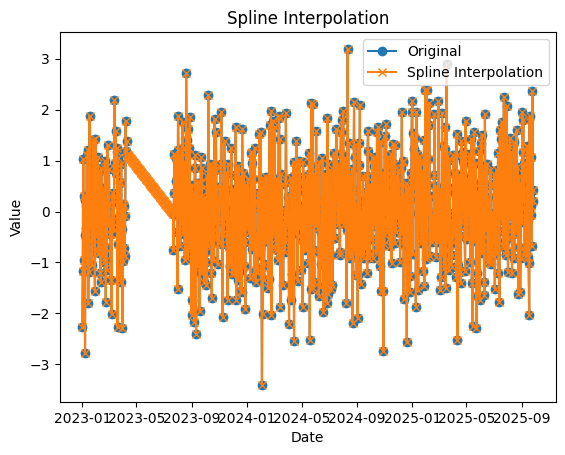

In [26]:
# 시계열 데이터 시각화
plt.plot(data['Date'], data['Value'], 'o-', label='Original')
plt.plot(data['Date'], data['Value_spline'], 'x-', label='Spline Interpolation')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Spline Interpolation')
plt.legend()
plt.show()

#### - 최근접 이웃 보간

결측치를 가장 가까운 이웃의 값으로 채웁니다. 최근접 이웃 보간은 가장 간단한 방법 중 하나로, 결측치를 가장 가까운 이웃의 값으로 대체하는 방식입니다. 데이터가 이산적이거나 이상치에 민감하지 않을 때 사용될 수 있습니다.

In [27]:
#최근접 이웃 보간 적용
data['Value_filled_2'] = data['Value'].interpolate(method='nearest')
print(data.loc[100:200])

          Date  Value  Value_filled_1  Value_spline  Value_filled_2
100 2023-04-11    NaN        1.115182      1.115182        1.126609
101 2023-04-12    NaN        1.103755      1.103755        1.126609
102 2023-04-13    NaN        1.092328      1.092328        1.126609
103 2023-04-14    NaN        1.080900      1.080900        1.126609
104 2023-04-15    NaN        1.069473      1.069473        1.126609
..         ...    ...             ...           ...             ...
196 2023-07-16    NaN        0.018177      0.018177       -0.038958
197 2023-07-17    NaN        0.006750      0.006750       -0.038958
198 2023-07-18    NaN       -0.004677     -0.004677       -0.038958
199 2023-07-19    NaN       -0.016104     -0.016104       -0.038958
200 2023-07-20    NaN       -0.027531     -0.027531       -0.038958

[101 rows x 5 columns]


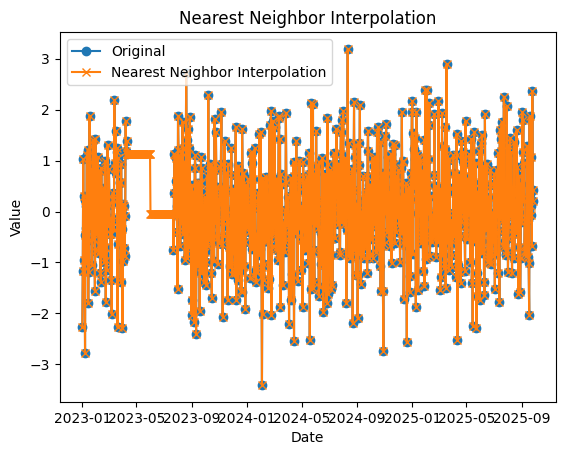

In [28]:
# 시계열 데이터 시각화
plt.plot(data['Date'], data['Value'], 'o-', label='Original')
plt.plot(data['Date'], data['Value_filled_2'], 'x-', label='Nearest Neighbor Interpolation')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Nearest Neighbor Interpolation')
plt.legend()
plt.show()

#### - 평균값 대처

평균값으로 대체하는 방법은 변수의 분포를 유지하면서 결측치를 적절히 대체할 수 있습니다. 이 방법은 전체 데이 터셋에서 해당 변수의 평균값을 사용하기 때문에 일반적인 값으로 대체됩니다. 또한, 평균값은 변수의 중심 경향을 나타내기 때문에 데이터의 전반적인 패턴을 유지할 수 있습니다.

평균값으로 대체하는 방법은 단순하면서도 효과적이기 때문에 널리 사용되는 방법 중 하나입니다. 그러나 데이터 의특성과상황에따라서다른결측치처리방법을고려해야할수도있습니다.

In [29]:
mean_value = data['Value'].mean()
print(mean_value)
data['Value_filled_3'] = data['Value'].fillna(mean_value)
print(data.loc[100:200])

0.0034488725047711476
          Date  Value  Value_filled_1  Value_spline  Value_filled_2   
100 2023-04-11    NaN        1.115182      1.115182        1.126609  \
101 2023-04-12    NaN        1.103755      1.103755        1.126609   
102 2023-04-13    NaN        1.092328      1.092328        1.126609   
103 2023-04-14    NaN        1.080900      1.080900        1.126609   
104 2023-04-15    NaN        1.069473      1.069473        1.126609   
..         ...    ...             ...           ...             ...   
196 2023-07-16    NaN        0.018177      0.018177       -0.038958   
197 2023-07-17    NaN        0.006750      0.006750       -0.038958   
198 2023-07-18    NaN       -0.004677     -0.004677       -0.038958   
199 2023-07-19    NaN       -0.016104     -0.016104       -0.038958   
200 2023-07-20    NaN       -0.027531     -0.027531       -0.038958   

     Value_filled_3  
100        0.003449  
101        0.003449  
102        0.003449  
103        0.003449  
104        0.00

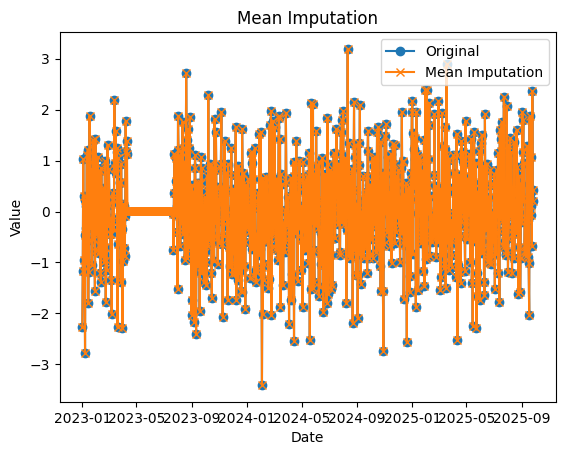

In [30]:
# 시계열 데이터 시각화
plt.plot(data['Date'], data['Value'], 'o-', label='Original')
plt.plot(data['Date'], data['Value_filled_3'], 'x-', label='Mean Imputation')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Mean Imputation')
plt.legend()
plt.show()

#### ARIMA 모델 활용하여 결측치 예측과 대처

ARIMA(자동회귀누적이동평균)는 시계열 데이터의 패턴을 파악하여 미래 값을 예측하는 모델입니다.

In [31]:
from statsmodels.tsa.arima.model import ARIMA

In [33]:
#ARIMA 모델 적합
model = ARIMA(data['Value'].dropna(), order=(1,1,1))
model_fit = model.fit()
"""
order=(1,1,1) 매개변수를 사용하여 ARIMA 모델을 설정합니다. 
order 매개변수는 AR, 차분(Differencing), MA 성분을 지정합니다. 
여기서 (1,1,1)은 AR(1) 모델, 차분(degree of differencing)이 1, 
그리고 MA(1) 모델을 의미합니다.
"""

#결측치 예측
predicted_values = model_fit.predict(start=50, end=2000)
print(predicted_values)

#결측치 대처
data.loc[100:200, 'Value_arima'] = predicted_values
print(data.loc[100:200])

50     -0.252677
51     -0.280708
52     -0.239058
53     -0.238077
54     -0.276774
          ...   
1996    0.075625
1997    0.075625
1998    0.075625
1999    0.075625
2000    0.075625
Name: predicted_mean, Length: 1951, dtype: float64
          Date  Value  Value_filled_1  Value_spline  Value_filled_2   
100 2023-04-11    NaN        1.115182      1.115182        1.126609  \
101 2023-04-12    NaN        1.103755      1.103755        1.126609   
102 2023-04-13    NaN        1.092328      1.092328        1.126609   
103 2023-04-14    NaN        1.080900      1.080900        1.126609   
104 2023-04-15    NaN        1.069473      1.069473        1.126609   
..         ...    ...             ...           ...             ...   
196 2023-07-16    NaN        0.018177      0.018177       -0.038958   
197 2023-07-17    NaN        0.006750      0.006750       -0.038958   
198 2023-07-18    NaN       -0.004677     -0.004677       -0.038958   
199 2023-07-19    NaN       -0.016104     -0.016104 

/Users/sang-yun/anaconda3/envs/AI/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sang-yun/anaconda3/envs/AI/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sang-yun/anaconda3/envs/AI/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sang-yun/anaconda3/envs/AI/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/sang-yun/anaconda3/envs/AI/lib/python3.8/site-packages/statsmodel

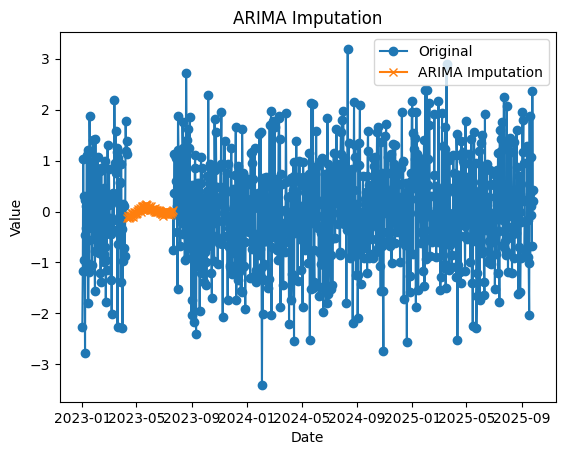

In [34]:
#시각화
plt.plot(data['Date'], data['Value'], 'o-', label='Original')
plt.plot(data['Date'], data['Value_arima'], 'x-', label='ARIMA Imputation')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ARIMA Imputation')
plt.legend()
plt.show()